In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
path = r"/kaggle/input/utkface-new/UTKFace"
import os
files=os.listdir(path)

In [2]:
print("Total Files : ",len(files))

Total Files :  23708


In [3]:
import cv2
ages=[]
genders=[]
images=[]
i = 0
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=path +'/'+fle
#   print(total, age, gender,i)
  image=cv2.imread(total)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)
  ages.append(age)
  genders.append(gender)
  i = i+1
  if i%1000==0:
        print(total, age, gender,i)
print(i)

/kaggle/input/utkface-new/UTKFace/50_0_3_20170113184235991.jpg.chip.jpg 50 0 1000
/kaggle/input/utkface-new/UTKFace/25_0_0_20170119171843896.jpg.chip.jpg 25 0 2000
/kaggle/input/utkface-new/UTKFace/43_0_4_20170104205649403.jpg.chip.jpg 43 0 3000
/kaggle/input/utkface-new/UTKFace/57_0_4_20170105171850037.jpg.chip.jpg 57 0 4000
/kaggle/input/utkface-new/UTKFace/59_0_0_20170111203716454.jpg.chip.jpg 59 0 5000
/kaggle/input/utkface-new/UTKFace/21_1_2_20170116171146065.jpg.chip.jpg 21 1 6000
/kaggle/input/utkface-new/UTKFace/78_0_1_20170111210701342.jpg.chip.jpg 78 0 7000
/kaggle/input/utkface-new/UTKFace/26_0_1_20170116010920708.jpg.chip.jpg 26 0 8000
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117120938226.jpg.chip.jpg 28 0 9000
/kaggle/input/utkface-new/UTKFace/27_1_1_20170117165603509.jpg.chip.jpg 27 1 10000
/kaggle/input/utkface-new/UTKFace/26_1_0_20170116164911648.jpg.chip.jpg 26 1 11000
/kaggle/input/utkface-new/UTKFace/34_0_1_20170116202042710.jpg.chip.jpg 34 0 12000
/kaggle/input

In [4]:
print(ages[24])
print(genders[24])

38
0


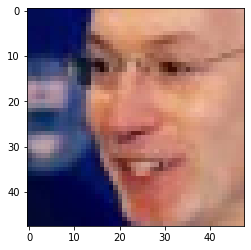

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[24])

35
0


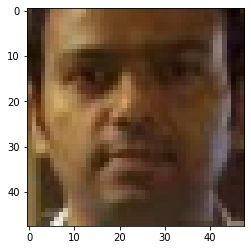

In [6]:
i = 30
print(ages[i])
print(genders[i])
plt.imshow(images[i])

25
0
25
0
25
1


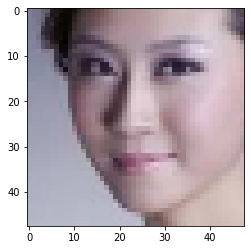

In [7]:
for i in range(100):
    if ages[i]==25:
        print(ages[i])
        print(genders[i])
        plt.imshow(images[i])

In [8]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [9]:
fldr = "./"
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

In [10]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


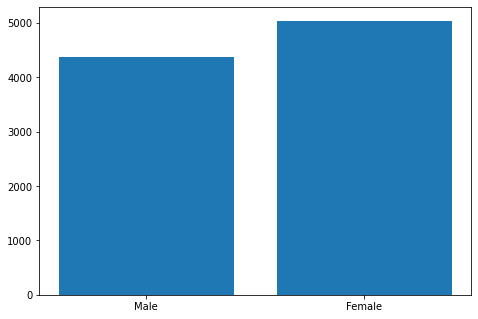

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

In [12]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [13]:
val=values.tolist()
cnt=counts.tolist()

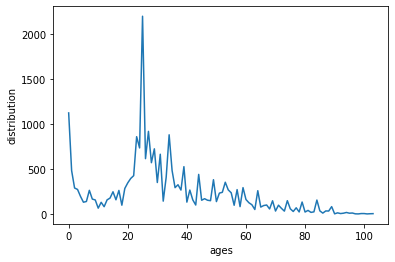

In [14]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [15]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [16]:
images_f_2=images_f/255

In [17]:
labels_f=np.array(labels)

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [21]:
Y_train[0:5]

array([[[26],
        [ 0]],

       [[32],
        [ 0]],

       [[45],
        [ 1]],

       [[36],
        [ 1]],

       [[45],
        [ 0]]])

In [22]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [23]:
Y_train_2[0][0:5]

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [24]:
Y_train_2[1][0:5]

array([[26],
       [32],
       [45],
       [36],
       [45]])

In [25]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",metrics=["accuracy"])
  
  return model


In [26]:
Model=model((48,48,3))

In [27]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [29]:
fle_s='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [30]:
History=Model.fit(X_train,Y_train_2,
                  batch_size=64,validation_data=(X_test,Y_test_2),
                  epochs=500,callbacks=[callback_list])

Epoch 1/500
278/278 [==============================] - 83s 292ms/step - loss: 18.6659 - sex_out_loss: 0.7211 - age_out_loss: 17.7387 - sex_out_accuracy: 0.5524 - age_out_accuracy: 0.0457 - val_loss: 20.4457 - val_sex_out_loss: 0.6588 - val_age_out_loss: 19.6303 - val_sex_out_accuracy: 0.5930 - val_age_out_accuracy: 0.0477

Epoch 00001: val_loss improved from inf to 20.44565, saving model to Age_sex_detection.h5
Epoch 2/500
278/278 [==============================] - 80s 289ms/step - loss: 14.3679 - sex_out_loss: 0.5959 - age_out_loss: 13.5994 - sex_out_accuracy: 0.6842 - age_out_accuracy: 0.0472 - val_loss: 13.4857 - val_sex_out_loss: 0.5532 - val_age_out_loss: 12.7004 - val_sex_out_accuracy: 0.7245 - val_age_out_accuracy: 0.0430

Epoch 00002: val_loss improved from 20.44565 to 13.48573, saving model to Age_sex_detection.h5
Epoch 3/500
278/278 [==============================] - 79s 285ms/step - loss: 11.4707 - sex_out_loss: 0.5179 - age_out_loss: 10.7099 - sex_out_accuracy: 0.7470 - age

In [31]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 6s 32ms/step - loss: 7.5934 - sex_out_loss: 0.2752 - age_out_loss: 6.3363 - sex_out_accuracy: 0.8924 - age_out_accuracy: 0.0477


[7.593425750732422,
 0.2752157747745514,
 6.33625602722168,
 0.8923569917678833,
 0.047747597098350525]

In [32]:
pred=Model.predict(X_test)

In [33]:
pred[1]

array([[ 8.484093 ],
       [27.454426 ],
       [ 2.033305 ],
       ...,
       [23.219778 ],
       [11.255352 ],
       [ 2.2320561]], dtype=float32)

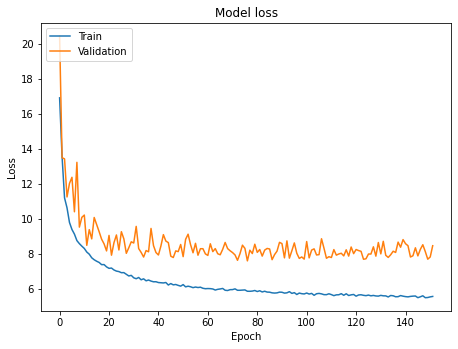

In [34]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,   wspace=0.35)

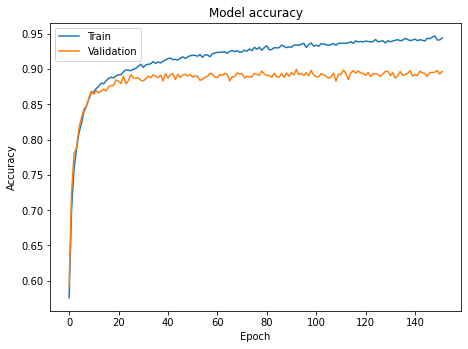

In [35]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

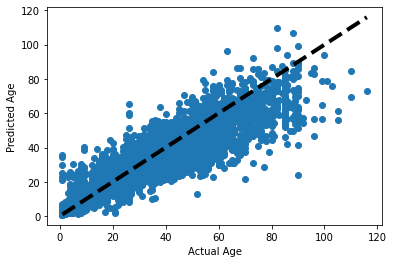

In [36]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [37]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [38]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report

In [39]:
report=classification_report(Y_test_2[0], Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3150
           1       0.89      0.88      0.88      2777

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [40]:
results = confusion_matrix(Y_test_2[0], Pred_l)

<AxesSubplot:>

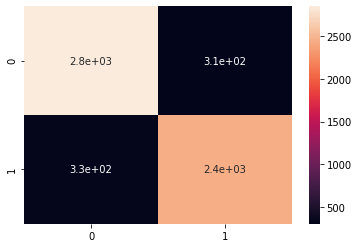

In [41]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [44]:
def test_image(ind,images_f,images_f_2,Model):
  plt.imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])

Predicted Age: 23
Predicted Sex: Female


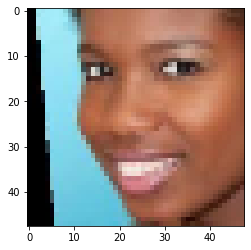

In [45]:
test_image(57,images_f,images_f_2,Model)

Predicted Age: 44
Predicted Sex: Male


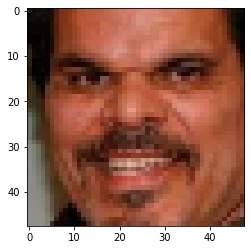

In [46]:
test_image(137,images_f,images_f_2,Model)

Predicted Age: 39
Predicted Sex: Male


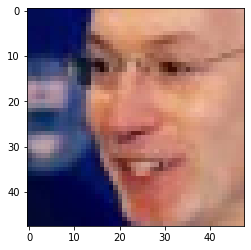

In [47]:
test_image(24,images_f,images_f_2,Model)